## Problem Statement:
"Build a regression model that can accurately predict the price of a car based on its features such as brand, model, year, fuel type, transmission, ownership, engine capacity, etc."

 ## Step 2: Load & Understand the Dataset
take a look at the dataset you provided (car details v4.csv) and examine the columns and structure.

Processing the file now...

Here’s a breakdown of your dataset and a suggested roadmap to complete the car price prediction project:

## Step 3: Dataset Summary
dataset has 2059 car records with 20 features, including:

Target Variable: Price

Numerical Features: Year, Kilometer, Length, Width, Height, Seating Capacity, Fuel Tank Capacity

Categorical Features: Make, Model, Fuel Type, Transmission, Location, Color, Owner, Seller Type, Drivetrain

Text/Composite Features: Engine, Max Power, Max Torque (need parsing to extract numerical values)

Missing Data: Some columns like Engine, Max Power, Max Torque, Drivetrain, etc., have missing values.



## Step 4: Project Roadmap
 1. Data Preprocessing
Handle missing values

Parse Engine, Max Power, Max Torque into numerical fields

Convert categorical variables (e.g., One-Hot Encoding)

Normalize or scale features if needed

 2. Exploratory Data Analysis (EDA)
Analyze correlation of features with Price

Visualize distributions, outliers

Check for skewness or data imbalance

 3. Feature Engineering
Create new features if relevant (e.g., car age = 2025 - Year)

Drop irrelevant or redundant features

 4. Model Selection
Try models like:

Linear Regression

Decision Tree Regressor

Random Forest

Gradient Boosting (e.g., XGBoost)

Evaluate using metrics like RMSE, MAE, R²

 5. Model Tuning
Use GridSearchCV / RandomizedSearchCV for hyperparameter tuning

 6. Model Evaluation
Train-test split

Cross-validation

Residual plots

### Import Libraries & Load Data

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:

# Load the data
df = pd.read_csv('car details v4.csv')


In [2]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


### Clean and Extract Numerical Values
2.1 Extract numeric value from Engine (e.g., "1248 cc" → 1248)

In [6]:
df['Engine_CC'] = df['Engine'].str.extract('(\d+)').astype(float)

2.2 Extract Max Power (e.g., "89 bhp @ 4000 rpm" → 89)

In [9]:
df['Max_Power_BHP'] = df['Max Power'].str.extract('(\d+\.?\d*)').astype(float)

2.3 Extract Max Torque (e.g., "200 Nm @ 1750 rpm" → 200)

In [12]:
df['Max_Torque_Nm'] = df['Max Torque'].str.extract('(\d+\.?\d*)').astype(float)

### Feature Engineering
3.1 Create a new feature: Car Age

In [15]:
df['Car_Age'] = 2025 - df['Year']

## Drop Irrelevant or Redundant Columns
We’ll drop:

Original composite columns

Year (since we have Car_Age)

Possibly high-cardinality or low-informative features (optional for now)

In [18]:
df.drop(['Engine', 'Max Power', 'Max Torque', 'Year','Model'], axis=1, inplace=True)

### Handle Missing Values
5.1 Check missing data

In [22]:
df.shape

(2059, 19)

In [24]:
missing = df.isnull().sum()
missing

Make                    0
Price                   0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
Engine_CC              80
Max_Power_BHP          80
Max_Torque_Nm          80
Car_Age                 0
dtype: int64

In [26]:
df_null = df[df["Drivetrain"].isnull()]

In [28]:
df_null

,Make,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine_CC,Max_Power_BHP,Max_Torque_Nm,Car_Age
33,Honda,860000,67000,Petrol,Automatic,Mumbai,Brown,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
69,Audi,1250000,50000,Diesel,Automatic,Mumbai,White,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
94,Mercedes-Benz,3900000,83400,Diesel,Automatic,Hyderabad,White,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
108,Honda,229000,38175,Petrol,Manual,Kolkata,Blue,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
117,Hyundai,120000,48500,LPG,Manual,Lucknow,Grey,Fourth,Individual,NaN,3565.0,1525.0,1590.0,5.0,35.0,1086.0,63.0,89.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,Toyota,555000,261236,Petrol,Manual,Mumbai,Silver,First,Individual,NaN,4555.0,1770.0,1755.0,8.0,55.0,1998.0,136.0,182.0,15
2009,Audi,775000,89000,Diesel,Automatic,Mohali,Black,Second,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
2025,Honda,195000,57885,Petrol,Automatic,Delhi,Beige,First,Individual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2035,Maruti Suzuki,265000,41000,Petrol,Manual,Pune,Brown,Second,Individual,NaN,3539.0,1475.0,1700.0,5.0,35.0,998.0,68.0,90.0,14


In [30]:
columns_to_check = [
    'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity',
    'Fuel Tank Capacity', 'Engine_CC', 'Max_Power_BHP', 'Max_Torque_Nm'
]

# Remove rows where all specified columns are null
df_cleaned = df.dropna(subset=columns_to_check, how='all')



In [32]:
df_cleaned.isnull().sum()

Make                   0
Price                  0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Drivetrain            72
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    49
Engine_CC             16
Max_Power_BHP         16
Max_Torque_Nm         16
Car_Age                0
dtype: int64

5.2 Fill or drop rows with missing data

In [35]:
df_cleaned

,Make,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine_CC,Max_Power_BHP,Max_Torque_Nm,Car_Age
0,Honda,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,3990.0,1680.0,1505.0,5.0,35.0,1198.0,87.0,109.0000,8
1,Maruti Suzuki,450000,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,3995.0,1695.0,1555.0,5.0,42.0,1248.0,74.0,190.0000,11
2,Hyundai,220000,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,3585.0,1595.0,1550.0,5.0,35.0,1197.0,79.0,112.7619,14
3,Toyota,799000,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,3995.0,1745.0,1510.0,5.0,37.0,1197.0,82.0,113.0000,6
4,Toyota,1950000,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,4735.0,1830.0,1795.0,7.0,55.0,2393.0,148.0,343.0000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,90300,Diesel,Manual,Surat,White,First,Individual,FWD,4585.0,1890.0,1785.0,7.0,70.0,2179.0,138.0,330.0000,9
2055,Hyundai,275000,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,FWD,3495.0,1550.0,1500.0,5.0,32.0,814.0,55.0,75.0000,11
2056,Ford,240000,73000,Petrol,Manual,Thane,Silver,First,Individual,FWD,3795.0,1680.0,1427.0,5.0,45.0,1196.0,70.0,102.0000,12
2057,BMW,4290000,60474,Diesel,Automatic,Coimbatore,White,First,Individual,RWD,4936.0,1868.0,1479.0,5.0,65.0,1995.0,188.0,400.0000,7


In [37]:
df_filtered = df.dropna(subset=['Transmission', 'Drivetrain'])

# Set plot style
sns.set(style="whitegrid")

sns.countplot(data=df_filtered, x='Transmission', hue='Drivetrain')

# Add titles and labels
plt.title('Relationship between Transmission and Drivetrain')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.legend(title='Drivetrain')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'sns' is not defined

In [39]:
import random

In [41]:
def fill_drivetrain(row):
    if pd.isna(row['Drivetrain']):
        if isinstance(row['Transmission'], str):
            transmission = row['Transmission'].lower()
            if 'manual' in transmission:
                return 'FWD'
            elif 'automatic' in transmission:
                return random.choice(['RWD', 'AWD'])
    return row['Drivetrain']


In [43]:
df_cleaned['Drivetrain'] = df_cleaned.apply(fill_drivetrain, axis=1)


C:\Users\laxmi\AppData\Local\Temp\ipykernel_8900\50146464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Drivetrain'] = df_cleaned.apply(fill_drivetrain, axis=1)


In [45]:
df_cleaned.isnull().sum()

Make                   0
Price                  0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Drivetrain             0
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    49
Engine_CC             16
Max_Power_BHP         16
Max_Torque_Nm         16
Car_Age                0
dtype: int64

In [47]:
fuel_tank_mean = df_cleaned["Fuel Tank Capacity"].mean().round(3)
Engine_CC_mean = df_cleaned["Engine_CC"].mean().round(3)
Max_Power_BHP_mean = df_cleaned["Max_Power_BHP"].mean().round(3)
Max_Torque_Nm_mean = df_cleaned["Max_Torque_Nm"].mean().round(3)


In [49]:
print(fuel_tank_mean, Engine_CC_mean,Max_Power_BHP_mean, Max_Torque_Nm_mean)

52.002 1692.576 129.612 245.851


In [51]:
df_cleaned["Fuel Tank Capacity"] = df_cleaned["Fuel Tank Capacity"].fillna(fuel_tank_mean)
df_cleaned["Engine_CC"] = df_cleaned["Engine_CC"].fillna(Engine_CC_mean)
df_cleaned["Max_Power_BHP"] = df_cleaned["Max_Power_BHP"].fillna(Max_Power_BHP_mean)
df_cleaned["Max_Torque_Nm"] = df_cleaned["Max_Torque_Nm"].fillna(Max_Torque_Nm_mean)

C:\Users\laxmi\AppData\Local\Temp\ipykernel_8900\1325079869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Fuel Tank Capacity"] = df_cleaned["Fuel Tank Capacity"].fillna(fuel_tank_mean)
C:\Users\laxmi\AppData\Local\Temp\ipykernel_8900\1325079869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Engine_CC"] = df_cleaned["Engine_CC"].fillna(Engine_CC_mean)
C:\Users\laxmi\AppData\Local\Temp\ipykernel_8900\1325079869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [53]:
categorical_list = ["Make","Fuel Type", "Transmission", "Owner", "Location", "Color", "Seller Type", "Drivetrain"]

In [55]:
df_cleaned.head()

,Make,Price,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine_CC,Max_Power_BHP,Max_Torque_Nm,Car_Age
0,Honda,505000,87150,Petrol,Manual,Pune,Grey,First,Corporate,FWD,3990.0,1680.0,1505.0,5.0,35.0,1198.0,87.0,109.0000,8
1,Maruti Suzuki,450000,75000,Diesel,Manual,Ludhiana,White,Second,Individual,FWD,3995.0,1695.0,1555.0,5.0,42.0,1248.0,74.0,190.0000,11
2,Hyundai,220000,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,FWD,3585.0,1595.0,1550.0,5.0,35.0,1197.0,79.0,112.7619,14
3,Toyota,799000,37500,Petrol,Manual,Mangalore,Red,First,Individual,FWD,3995.0,1745.0,1510.0,5.0,37.0,1197.0,82.0,113.0000,6
4,Toyota,1950000,69000,Diesel,Manual,Mumbai,Grey,First,Individual,RWD,4735.0,1830.0,1795.0,7.0,55.0,2393.0,148.0,343.0000,7


In [57]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':  # Check if the column's data type is object
        unique_count = df_cleaned[column].nunique()  # Count unique values
        print(f"Column: {column}, Unique Values Count: {unique_count}")


Column: Make, Unique Values Count: 33
Column: Fuel Type, Unique Values Count: 8
Column: Transmission, Unique Values Count: 2
Column: Location, Unique Values Count: 76
Column: Color, Unique Values Count: 17
Column: Owner, Unique Values Count: 6
Column: Seller Type, Unique Values Count: 3
Column: Drivetrain, Unique Values Count: 3


## One-Hot Encode Categorical Features

In [60]:
# Target Encoding for "Make"
make_mean = df_cleaned.groupby('Make')['Fuel Type'].count()  # Using Fuel Type count as a proxy target for example
df_cleaned['Make_encoded'] = df_cleaned['Make'].map(make_mean)

# Frequency Encoding for "Location"
location_freq = df_cleaned['Location'].value_counts() / len(df_cleaned)
df_cleaned['Location_encoded'] = df_cleaned['Location'].map(location_freq)

# One-Hot Encoding for the rest of the columns
df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=['Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Drivetrain', 'Color'])

# Drop the original columns that were encoded
df_cleaned_encoded = df_cleaned_encoded.drop(columns=['Make', 'Location'])


C:\Users\laxmi\AppData\Local\Temp\ipykernel_8900\1623538554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Make_encoded'] = df_cleaned['Make'].map(make_mean)
C:\Users\laxmi\AppData\Local\Temp\ipykernel_8900\1623538554.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Location_encoded'] = df_cleaned['Location'].map(location_freq)


In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming df_cleaned_encoded is your DataFrame after encoding

# List of numerical columns to scale (you can modify this list based on your actual numerical columns)
numerical_columns = ["Fuel Tank Capacity",	"Engine_CC", 	"Max_Power_BHP",	"Max_Torque_Nm", "Length",	"Width"	,"Height", "Kilometer"]

# Standardize (Z-Score Normalization)
scaler = MinMaxScaler()
df_cleaned_encoded[numerical_columns] = scaler.fit_transform(df_cleaned_encoded[numerical_columns])

# Alternatively, Min-Max Scaling (if you prefer this approach)
# scaler = MinMaxScaler()
# df_cleaned_encoded[numerical_columns] = scaler.fit_transform(df_cleaned_encoded[numerical_columns])



In [64]:
df_cleaned_encoded

,Price,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine_CC,Max_Power_BHP,Max_Torque_Nm,...,Color_Grey,Color_Maroon,Color_Orange,Color_Others,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_White,Color_Yellow
0,505000,0.043575,0.360729,0.275168,0.409639,5.0,0.222222,0.096180,0.0832,0.083333,...,1,0,0,0,0,0,0,0,0,0
1,450000,0.037500,0.362753,0.295302,0.469880,5.0,0.300000,0.104558,0.0624,0.193989,...,0,0,0,0,0,0,0,0,1,0
2,220000,0.033500,0.196761,0.161074,0.463855,5.0,0.222222,0.096012,0.0704,0.088473,...,0,1,0,0,0,0,0,0,0,0
3,799000,0.018750,0.362753,0.362416,0.415663,5.0,0.244444,0.096012,0.0752,0.088798,...,0,0,0,0,0,0,1,0,0,0
4,1950000,0.034500,0.662348,0.476510,0.759036,7.0,0.444444,0.296414,0.1808,0.403005,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,850000,0.045150,0.601619,0.557047,0.746988,7.0,0.611111,0.260556,0.1648,0.385246,...,0,0,0,0,0,0,0,0,1,0
2055,275000,0.041500,0.160324,0.100671,0.403614,5.0,0.188889,0.031836,0.0320,0.036885,...,0,0,0,0,0,0,0,0,1,0
2056,240000,0.036500,0.281781,0.275168,0.315663,5.0,0.333333,0.095845,0.0560,0.073770,...,0,0,0,0,0,0,0,1,0,0
2057,4290000,0.030237,0.743725,0.527517,0.378313,5.0,0.555556,0.229725,0.2448,0.480874,...,0,0,0,0,0,0,0,0,1,0


In [66]:
df_cleaned_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1995 entries, 0 to 2058
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Price                                1995 non-null   int64  
 1   Kilometer                            1995 non-null   float64
 2   Length                               1995 non-null   float64
 3   Width                                1995 non-null   float64
 4   Height                               1995 non-null   float64
 5   Seating Capacity                     1995 non-null   float64
 6   Fuel Tank Capacity                   1995 non-null   float64
 7   Engine_CC                            1995 non-null   float64
 8   Max_Power_BHP                        1995 non-null   float64
 9   Max_Torque_Nm                        1995 non-null   float64
 10  Car_Age                              1995 non-null   int64  
 11  Make_encoded                  

In [68]:
df_cleaned_encoded.describe()

,Price,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Engine_CC,Max_Power_BHP,Max_Torque_Nm,...,Color_Grey,Color_Maroon,Color_Orange,Color_Others,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_White,Color_Yellow
count,1.995000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.00000,1995.000000
mean,1.716503e+06,0.026963,0.478486,0.393278,0.514139,5.306266,0.411136,0.179051,0.151379,0.270288,...,0.107268,0.017043,0.008020,0.005514,0.000501,0.002005,0.075689,0.140351,0.38797,0.003509
std,2.440421e+06,0.028996,0.179133,0.181565,0.163945,0.822170,0.165815,0.107431,0.103700,0.191122,...,0.309531,0.129463,0.089217,0.074068,0.022389,0.044744,0.264567,0.347438,0.48741,0.059146
min,4.900000e+04,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,4.940000e+05,0.014296,0.358704,0.295302,0.385542,5.000000,0.300000,0.096180,0.076800,0.091530,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,8.400000e+05,0.025000,0.514575,0.395973,0.457831,5.000000,0.388889,0.146448,0.131200,0.207650,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.950000e+06,0.036000,0.619433,0.478523,0.614458,5.000000,0.500000,0.229725,0.217600,0.412568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
max,3.500000e+07,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


<Axes: >

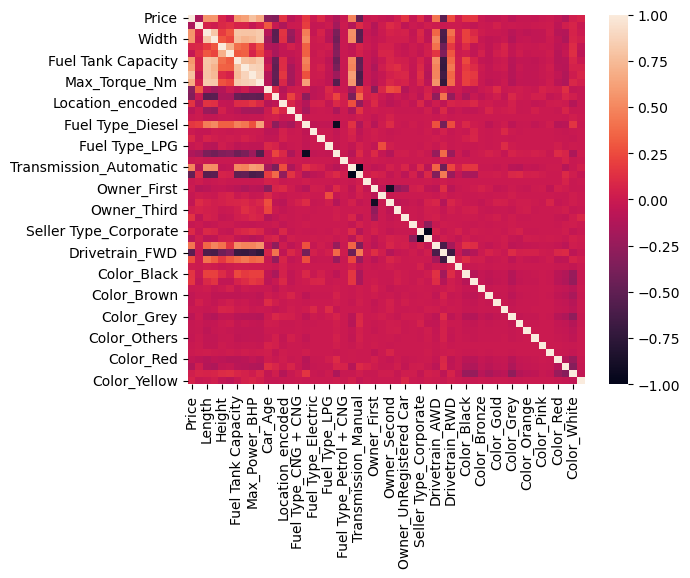

In [110]:
sns.heatmap(df_cleaned_encoded.corr())

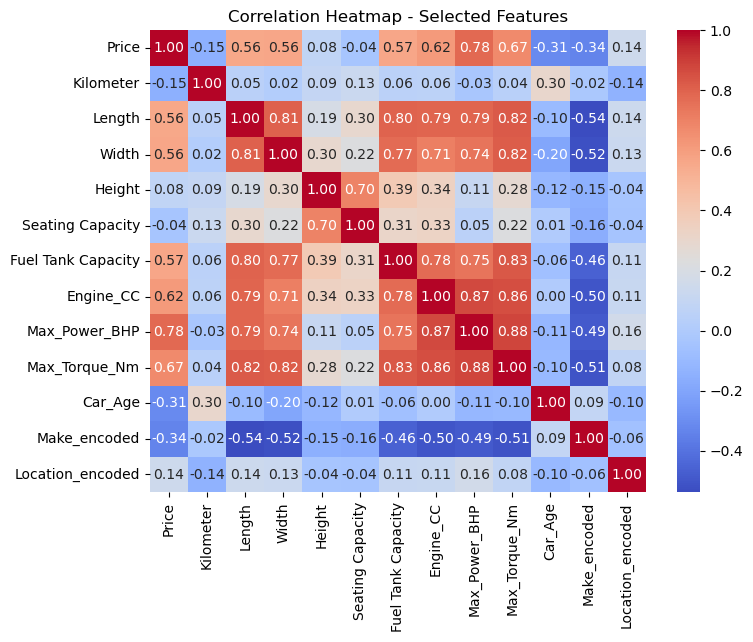

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns you want to visualize
selected_columns = [
    "Price", 
    "Kilometer", 
    "Length", 
    "Width", 
    "Height", 
    "Seating Capacity", 
    "Fuel Tank Capacity", 
    "Engine_CC", 
    "Max_Power_BHP", 
    "Max_Torque_Nm", 
    "Car_Age", 
    "Make_encoded", 
    "Location_encoded"
]


# Compute correlation matrix for selected columns
corr_matrix = df_cleaned_encoded[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Selected Features")
plt.show()


## Split Data for Modeling

In [136]:
from sklearn.model_selection import train_test_split

X = df_cleaned_encoded.drop(['Price'], axis=1)

y = df_cleaned_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building & Training
 8.1 Import Libraries

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

8.2 Define a Function to Evaluate Models

In [142]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Model: {model.__class__.__name__}")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print('-' * 40)

8.3 Train and Evaluate Models

In [145]:
# Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model, X_train, y_train, X_test, y_test)


# Random Forest
rf_model = RandomForestRegressor(n_estimators=300, random_state=42)
evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Clean column names to remove problematic characters
X_train.columns = X_train.columns.str.replace('[\[\]<>(){}]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[\[\]<>(){}]', '', regex=True)

X.columns = X.columns.str.replace('[\[\]<>(){}]', '', regex=True)
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.2, random_state=42)
evaluate_model(xgb_model, X_train, y_train, X_test, y_test)


Model: LinearRegression
R2 Score: 0.76191450041147
MAE: 776397.4674993928
RMSE: 1123696.1774752669
----------------------------------------
Model: RandomForestRegressor
R2 Score: 0.8952719599228073
MAE: 290904.1187050961
RMSE: 745270.4788820063
----------------------------------------
Model: XGBRegressor
R2 Score: 0.8121658634373121
MAE: 295001.7296757519
RMSE: 998089.9716065926
----------------------------------------


In [147]:
import streamlit as st
import pandas as pd
import numpy as np
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

st.set_page_config(page_title="Car Price Predictor", layout="centered")

st.title("🚗 Car Price Prediction Web App")

# Sample data loading (replace with actual CSV for full app)
@st.cache_data
def load_data():
    df = pd.read_csv("car details v4.csv")

    df['Engine_CC'] = df['Engine'].str.extract('(\d+)').astype(float)
    df['Max_Power_BHP'] = df['Max Power'].str.extract('(\d+\.?\d*)').astype(float)
    df['Max_Torque_Nm'] = df['Max Torque'].str.extract('(\d+\.?\d*)').astype(float)
    df['Car_Age'] = 2025 - df['Year']

    df.drop(['Engine', 'Max Power', 'Max Torque', 'Year', 'Model'], axis=1, inplace=True)

    df = df.dropna(subset=['Transmission', 'Drivetrain'])

    def fill_drivetrain(row):
        if pd.isna(row['Drivetrain']):
            if isinstance(row['Transmission'], str):
                transmission = row['Transmission'].lower()
                if 'manual' in transmission:
                    return 'FWD'
                elif 'automatic' in transmission:
                    return random.choice(['RWD', 'AWD'])
        return row['Drivetrain']

    df['Drivetrain'] = df.apply(fill_drivetrain, axis=1)

    df["Fuel Tank Capacity"].fillna(df["Fuel Tank Capacity"].mean(), inplace=True)
    df["Engine_CC"].fillna(df["Engine_CC"].mean(), inplace=True)
    df["Max_Power_BHP"].fillna(df["Max_Power_BHP"].mean(), inplace=True)
    df["Max_Torque_Nm"].fillna(df["Max_Torque_Nm"].mean(), inplace=True)

    categorical_list = ["Make", "Fuel Type", "Transmission", "Owner", "Location", "Color", "Seller Type", "Drivetrain"]
    df = pd.get_dummies(df, columns=categorical_list, drop_first=True)

    return df

df = load_data()

# Train model
X = df.drop("Price", axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# User Input UI
st.header("Enter Car Details")

make = st.selectbox("Make", df.columns[df.columns.str.startswith("Make_")].str.replace("Make_", ""))
fuel = st.selectbox("Fuel Type", df.columns[df.columns.str.startswith("Fuel Type_")].str.replace("Fuel Type_", ""))
trans = st.selectbox("Transmission", df.columns[df.columns.str.startswith("Transmission_")].str.replace("Transmission_", ""))
owner = st.selectbox("Owner", df.columns[df.columns.str.startswith("Owner_")].str.replace("Owner_", ""))
location = st.selectbox("Location", df.columns[df.columns.str.startswith("Location_")].str.replace("Location_", ""))
color = st.selectbox("Color", df.columns[df.columns.str.startswith("Color_")].str.replace("Color_", ""))
seller = st.selectbox("Seller Type", df.columns[df.columns.str.startswith("Seller Type_")].str.replace("Seller Type_", ""))
drivetrain = st.selectbox("Drivetrain", df.columns[df.columns.str.startswith("Drivetrain_")].str.replace("Drivetrain_", ""))

car_age = st.slider("Car Age", 0, 30, 5)
mileage = st.number_input("Mileage (km driven)", min_value=0)
engine_cc = st.number_input("Engine CC", min_value=500, max_value=7000, value=1500)
power = st.number_input("Max Power (BHP)", min_value=20.0, max_value=800.0, value=80.0)
torque = st.number_input("Max Torque (Nm)", min_value=30.0, max_value=1500.0, value=120.0)
fuel_tank = st.number_input("Fuel Tank Capacity (L)", min_value=20.0, max_value=100.0, value=45.0)
seats = st.slider("Seating Capacity", 2, 10, 5)
length = st.number_input("Car Length (mm)", min_value=2500.0, max_value=6000.0, value=4000.0)
width = st.number_input("Car Width (mm)", min_value=1200.0, max_value=2500.0, value=1700.0)
height = st.number_input("Car Height (mm)", min_value=1000.0, max_value=2000.0, value=1500.0)

# Create input data
input_data = pd.DataFrame(np.zeros((1, X.shape[1])), columns=X.columns)
input_data["Kilometers Driven"] = mileage
input_data["Engine_CC"] = engine_cc
input_data["Max_Power_BHP"] = power
input_data["Max_Torque_Nm"] = torque
input_data["Fuel Tank Capacity"] = fuel_tank
input_data["Seating Capacity"] = seats
input_data["Length"] = length
input_data["Width"] = width
input_data["Height"] = height
input_data["Car_Age"] = car_age

# One-hot encode selections
for col in input_data.columns:
    if col.endswith(make): input_data[col] = 1
    if col.endswith(fuel): input_data[col] = 1
    if col.endswith(trans): input_data[col] = 1
    if col.endswith(owner): input_data[col] = 1
    if col.endswith(location): input_data[col] = 1
    if col.endswith(color): input_data[col] = 1
    if col.endswith(seller): input_data[col] = 1
    if col.endswith(drivetrain): input_data[col] = 1

# Predict
if st.button("Predict Price"):
    predicted_price = model.predict(input_data)[0]
    st.success(f"Estimated Car Price: ₹ {predicted_price:,.2f}")


2025-05-06 03:01:51.132 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 03:01:51.132 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 03:01:51.555 
  command:

    streamlit run C:\Users\laxmi\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-06 03:01:51.555 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 03:01:51.555 No runtime found, using MemoryCacheStorageManager
2025-05-06 03:01:51.573 No runtime found, using MemoryCacheStorageManager
2025-05-06 03:01:51.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-06 03:01:51.575 Thread 'MainThread': missing ScriptRunContext! This warning ca